# CarDekho dataset

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression

## Loading the dataset

In [3]:
car_df = pd.read_csv('car data.csv')

In [4]:
car_df

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,honda,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,honda,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,honda,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,honda,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


The size of the dataset is (301 * 10) and there are no missing values.

## Visualizing the data

honda            70
hyndai           50
maruti suzuki    50
other            39
toyota           36
bajaj            25
hero             15
tvs               8
yamaha            8
Name: company, dtype: int64


<AxesSubplot:title={'center':'Number of cars of different manufacturers'}, ylabel='count'>

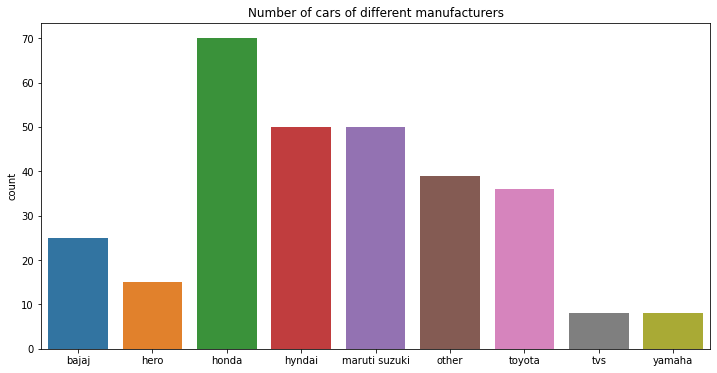

In [6]:
print(car_df['company'].value_counts())
plt.figure(figsize = (12,6))
plt.title('Number of cars of different manufacturers')
sns.countplot(x=sorted(car_df['company']))

Manual       261
Automatic     40
Name: Transmission, dtype: int64


<AxesSubplot:title={'center':'Number of cars based on transmission type'}, xlabel='Transmission', ylabel='count'>

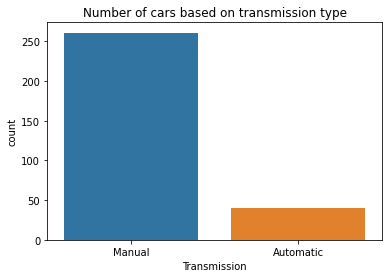

In [7]:
print(car_df['Transmission'].value_counts())
plt.title('Number of cars based on transmission type')
sns.countplot(x=car_df['Transmission'])

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


<AxesSubplot:title={'center':'Number of cars based on fuel type'}, xlabel='Fuel_Type', ylabel='count'>

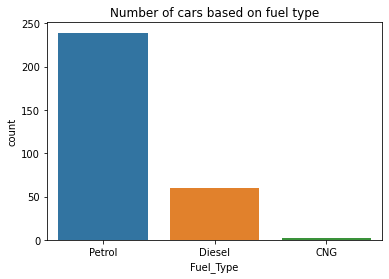

In [8]:
print(car_df['Fuel_Type'].value_counts())
plt.title('Number of cars based on fuel type')
sns.countplot(x=car_df['Fuel_Type'])

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


<AxesSubplot:title={'center':'Number of cars based on seller type'}, xlabel='Seller_Type', ylabel='count'>

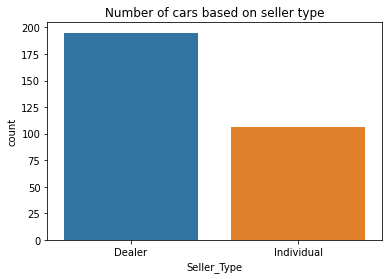

In [9]:
print(car_df['Seller_Type'].value_counts())
plt.title('Number of cars based on seller type')
sns.countplot(x=car_df['Seller_Type'])

In [10]:
car_df['Fuel_Type'] = car_df['Fuel_Type'].map({'Petrol': 1, 'Diesel': 2, 'CNG': 3})
car_df['Transmission'] = car_df['Transmission'].map({'Manual': 1, 'Automatic': 2})
car_df['Seller_Type'] = car_df['Seller_Type'].map({'Individual': 1, 'Dealer': 2})

Text(0, 0.5, 'Cars sold')

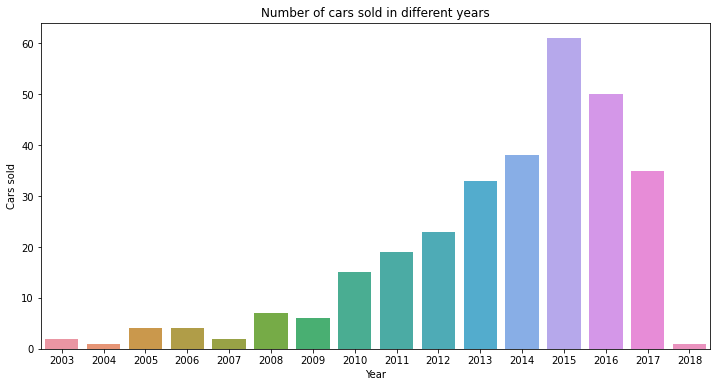

In [11]:
keys = [year for year, df in car_df.groupby(["Year"])]
plt.figure(figsize = (12,6))
plt.title('Number of cars sold in different years')
sns.barplot(x=keys, y=car_df.groupby(["Year"]).count()["Car_Name"])
plt.xlabel("Year")
plt.ylabel("Cars sold")

- Most number of cars were sold in the year 2015

0      40.071556
1      50.209644
2      26.395939
3      31.325301
4      33.042213
         ...    
296    18.103448
297    32.203390
298    69.545455
299     8.000000
300    10.169492
Name: PriceDecreasePer, Length: 301, dtype: float64


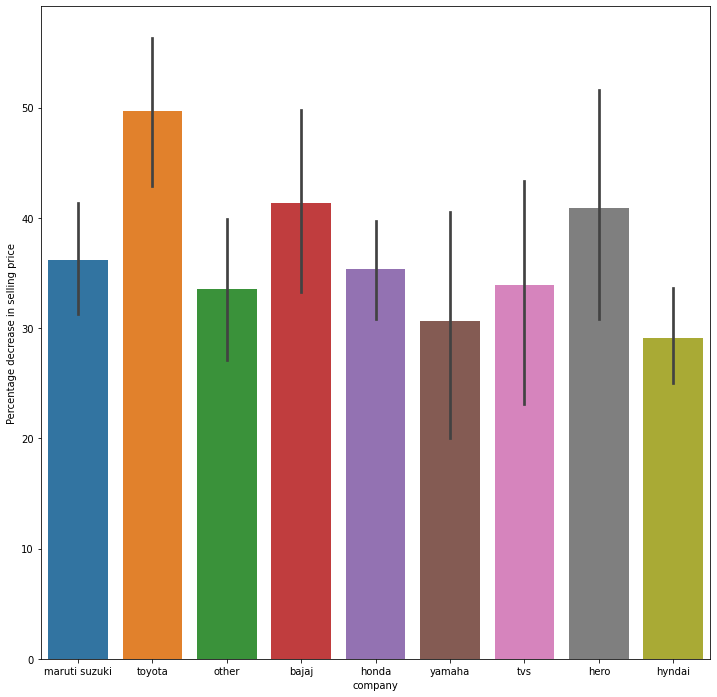

In [12]:
car_df['PriceDecreasePer'] = (car_df['Present_Price'] - car_df['Selling_Price']) / (car_df['Present_Price']) * 100
print(car_df['PriceDecreasePer'])
plt.figure(figsize=(12, 12))
sns.barplot(data=car_df, x='company', y='PriceDecreasePer')
plt.ylabel('Percentage decrease in selling price')
car_df.drop(columns=['PriceDecreasePer'], axis=1, inplace=True)

- Toyota suffers the highest price decrease in selling price while hyundai and yamaha have the least percentage decrease.

## Correlation between data fields

In [13]:
car_df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,0.352415,0.080466,-0.055705
Seller_Type,0.039896,0.550724,0.512030,0.101419,0.352415,1.000000,0.063240,-0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,-0.124269,0.050316,1.000000


<AxesSubplot:>

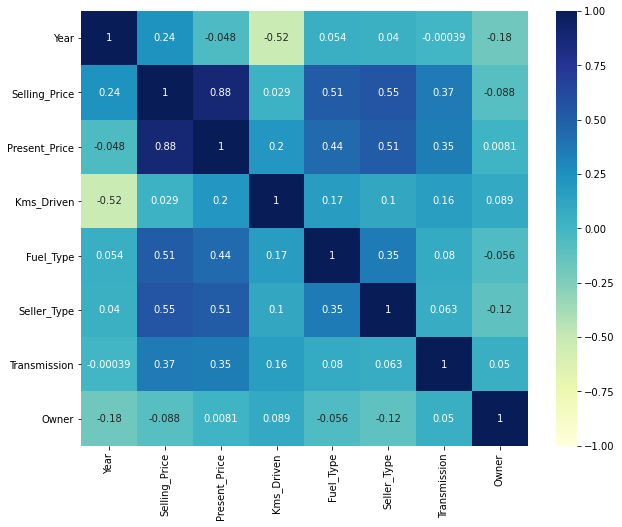

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(car_df.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap='YlGnBu')

- Year has highly negative correlation with Kms_Driven which means that older cars have been driven more.
- Selling_Price and Present_Price are highly correlated with Transmission, Fuel_Type, Seller_Type. They both are highly correlatedd as well.

## Making a ML model

In [15]:
x = car_df[['Present_Price', 'Seller_Type', 'Fuel_Type', 'Transmission', 'Year']]
y = car_df['Selling_Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.25, test_size=0.75, shuffle=True)

classifiers = [
    ARDRegression(),
    BayesianRidge(),
    LinearRegression()]

for clf in classifiers:
    print(clf)
    clf.fit(x_train, y_train)
    print('Accuracy = %.2f%%' %(clf.score(x_train, y_train) * 100), '\n')

ARDRegression()
Accuracy = 92.29% 

BayesianRidge()
Accuracy = 92.18% 

LinearRegression()
Accuracy = 92.39% 



### Calculating importance of different data fields

Feature:   Present_Price; Importance: 0.4863
Feature:     Seller_Type; Importance: 0.5955
Feature:       Fuel_Type; Importance: 0.9723
Feature:    Transmission; Importance: 1.6966
Feature:            Year; Importance: 0.4654


<AxesSubplot:>

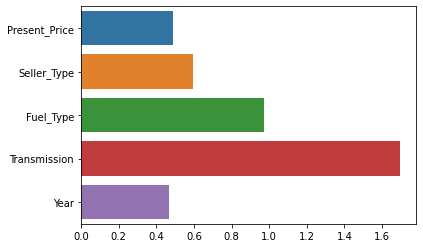

In [16]:
clf = LinearRegression()
clf.fit(x_train, y_train)
labels = ['Present_Price', 'Seller_Type', 'Fuel_Type', 'Transmission', 'Year']
importance = clf.coef_
for i in range(len(labels)):
    print('Feature: %15s; Importance: %.4f' %(labels[i], importance[i]))
sns.barplot(x=importance, y=labels)